In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba

c:\Users\esteb\Escritorio\physics\mestrado_thz_physics
['20231207-132823__Eduardo__THZ57-60__PMP0__S2207L__8RH__300K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON - Copia.dat', '20231207-132823__Eduardo__THZ57-60__PMP0__S2207L__8RH__300K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-132911__Eduardo__THZ57-60__PMP0__S2207L__8RH__300K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133137__Eduardo__THZ57-60__PMP0__S2207L__8RH__280K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133225__Eduardo__THZ57-60__PMP0__S2207L__8RH__280K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133314__Eduardo__THZ57-60__PMP0__S2207L__8RH__280K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133540__Eduardo__THZ57-60__PMP0__S2207L__8RH__260K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133630__Eduardo__THZ57-60__PMP0__S2207L__8RH__260K__2x3mmTeflonWindows+3mmHole+

C:\Users\esteb\AppData\Local\Temp\ipykernel_10100\775332048.py:346: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\esteb\AppData\Local\Temp\ipykernel_10100\775332048.py:346: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


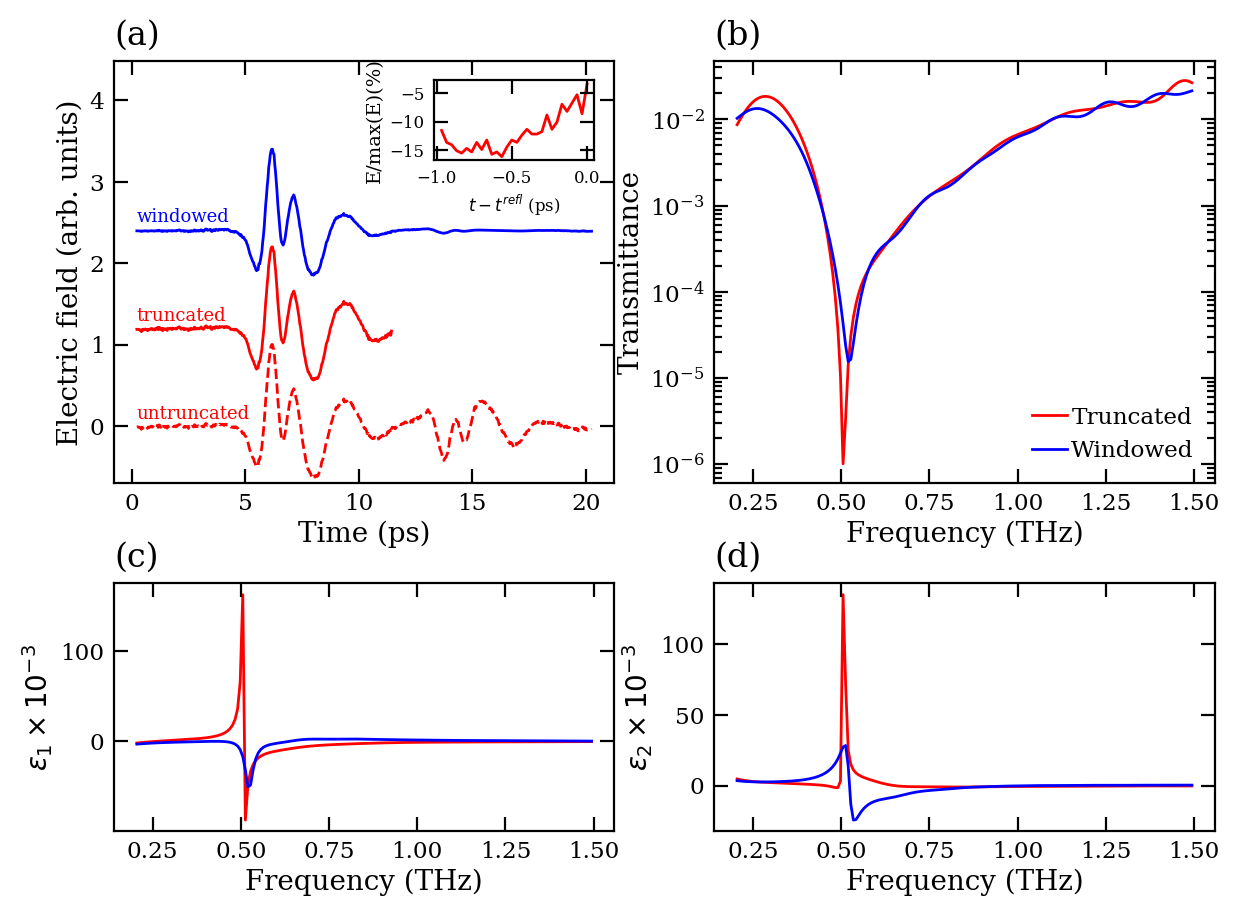

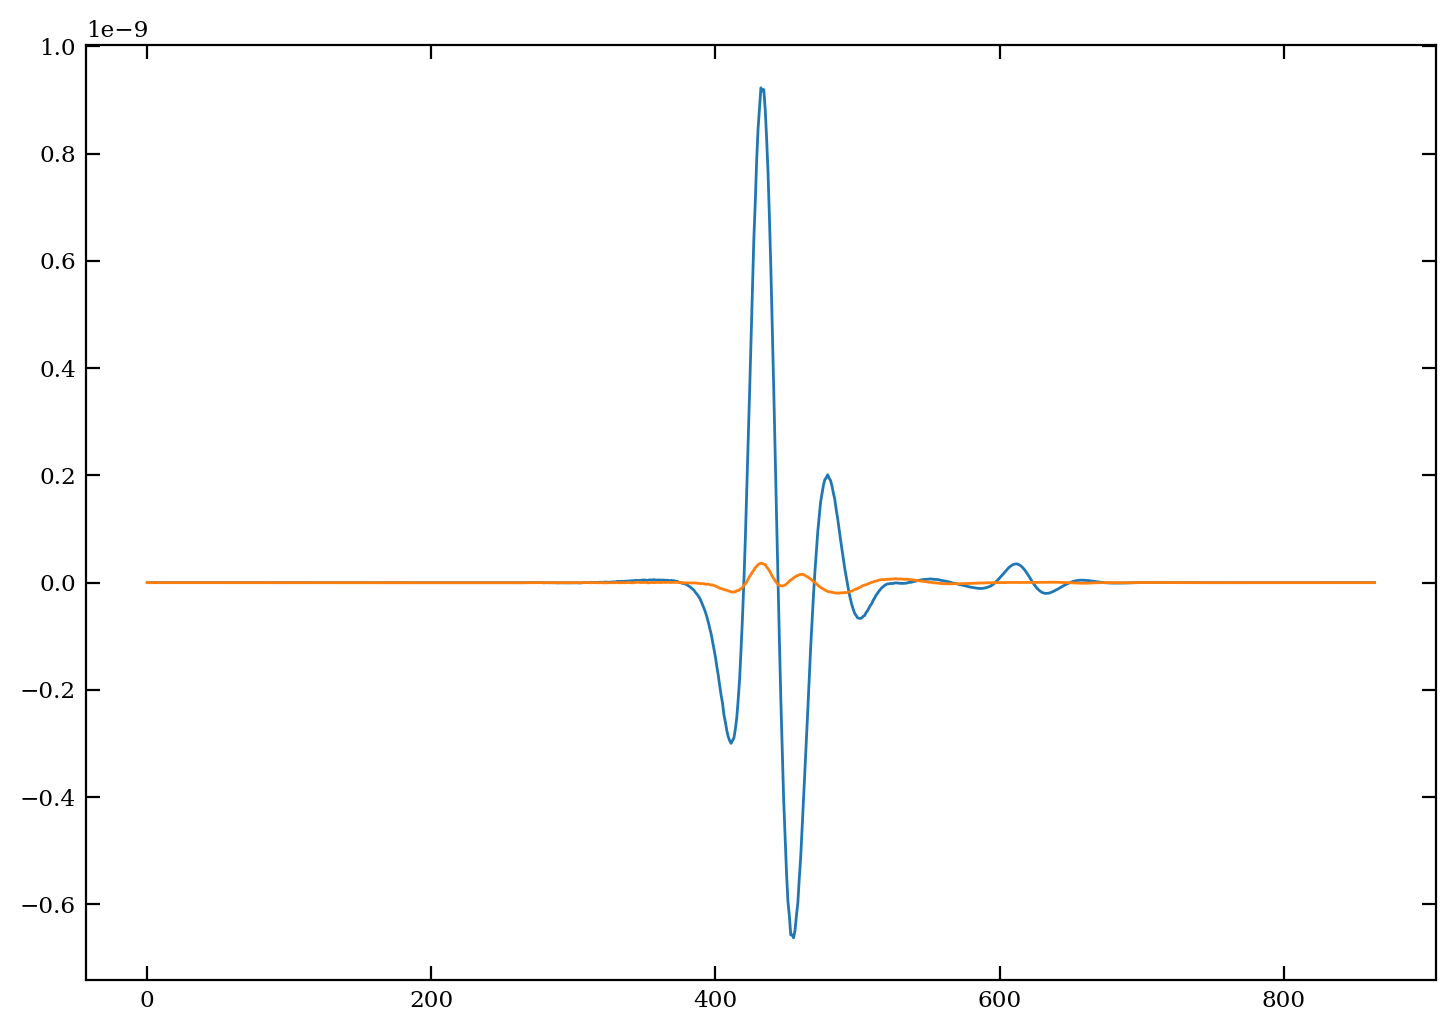

In [4]:


print(os.getcwd())

#import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual, 'PbTe', '20-20')

#rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20'
carpeta_ref = os.path.join(ruta_actual,"PbTe","substrate","20-20")
#carpeta_ref = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\substrate\20-20'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)


#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0.446-0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.0016

# Parámetros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal.windows import gaussian

left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
# Cambia la línea de creación de subplots para usar height_ratios
f, axs = plt.subplots(2, 2, figsize=(7.1, 5), dpi=200, 
                      gridspec_kw={'hspace': 0.3, 'height_ratios': [1.7, 1]})
N = 2**12

# Paths
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]

# Ventanas

# Datos sin ventana
x, y_rect = getFilterdata(path_signal, right_sample, left)
x_ref, y_ref_rect = getFilterdata(path_ref, right_subs, left)

a1 = right_sample #- x.iloc[len(x)//2]
a2 = right_subs #- x_ref.iloc[len(x_ref)//2]
x = x #- x.iloc[len(x)//2]
x_ref = x_ref #- x_ref.iloc[len(x_ref)//2]

# --- Subplot (a) ---
ax = axs[0, 0]

val = 2.2
retard = 386

min_x_global = min((x - retard).min(), (x_ref - retard).min())
x -= (retard + min_x_global)
x_ref -= (retard + min_x_global)

# --- Subplot (a) ---
ax = axs[0, 0]
val = 2.2

# Segunda señal de referencia (NO usada en inset)
right_sample_proof = right_sample + 25
x_ref2, y_ref2 = getFilterdata(path_ref, right_sample_proof, left)
x_ref2 -= (retard + min_x_global)
# ax.plot(x_ref2, y_ref2/max(y_ref2)+val ,'--k')

# Segunda señal de muestra (línea punteada roja: untruncated)
x2, y2 = getFilterdata(path_signal, right_sample_proof, left)
x2 -= (retard + min_x_global)

factor = 1

y2 = y2/max(y2)
line_untrunc, = ax.plot(x2, y2*factor ,'--r')

# Señal truncada: línea roja sólida

y_rect = y_rect/max(y_rect)
val_rec = 1.2 * max(y2)
line_sam, = ax.plot(x, y_rect + val_rec, 'r')

# Ventaneado: línea azul sólida
x_vent, y_vent = getFilterdata(path_signal, right_sample_proof, left)

# Convertir a arrays
xv = x_vent.values.copy()
yv = y_vent.values.copy()

# Encontrar el índice del máximo de la señal
idx_max = np.argmax(yv)

# Crear ventana gaussiana centrada en cero
std = 100
gauss_win = gaussian(M=len(yv), std=std)

# Desplazar la ventana para alinear el máximo
shift = idx_max - len(yv) // 2
gauss_win_shifted = np.roll(gauss_win, shift)

# Eje x ajustado
xv -= (retard + min_x_global)

# Aplicar ventana
y_windowed = yv * gauss_win_shifted
y_windowed = y_windowed/max(y_windowed)
# Graficar
line_win, = ax.plot(xv, y_windowed + val_rec*2, 'b')

# Etiquetas de texto al inicio de cada curva
# (usamos el primer punto visible de cada curva para ubicar la etiqueta)
ax.text(x2.iloc[0], (y2.iloc[0]*(factor-4)), 'untruncated', color='r', fontsize=6.5, va='bottom')
ax.text(x.iloc[0], (y_rect.iloc[0] + val_rec*(1+0.05)), 'truncated', color='r', fontsize=6.5, va='bottom')
ax.text(xv[0], (y_windowed[0] + val_rec*(2+0.05)), 'windowed', color='b', fontsize=6.5, va='bottom')

# Configuración de ejes
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Electric field (arb. units)')
ax.set_title('(a)', loc='left')
ax.set_ylim(min(y2*factor*(1+0.1)),max(y_windowed + val_rec*(2+0.9)))


# --- Crear el inset ---
inset = inset_axes(
    ax,
    width=0.8,
    height=0.4,
    loc='upper right',
    bbox_to_anchor=(-0.04, -0.045, 1, 1),  # x0, y0, width, height
    bbox_transform=ax.transAxes,
    borderpad=0
)


# 1. Extraer últimos puntos visibles para las 3 curvas relevantes
n_points = 30

# Línea punteada roja (untruncated)
# inset.plot(x2.iloc[-n_points:] - x2.iloc[-1], 
#            y2.iloc[-n_points:] / max(y2) * 100, 
#            '--r')

# Línea roja sólida (truncated)
inset.plot(x.iloc[-n_points:] - x.iloc[-1], 
           y_rect.iloc[-n_points:] / max(y_rect) * 100, 
           'r')

# Línea azul sólida (windowed)
xv_last = xv[-n_points:] - xv[-1]
yw_last = y_windowed[-n_points:] / max(y_windowed) * 100
# inset.plot(xv_last, yw_last, 'b')

# 2. Configuración del inset
# inset.legend(['untruncated', 'truncated', 'windowed'], fontsize=2, framealpha=0.5)
inset.set_xlabel('$t-t^{refl}$ (ps)', fontsize=6)
inset.set_ylabel('E/max(E)(%)', fontsize=7)
inset.tick_params(labelsize=6)

# 4. Opcional: Resaltar el origen (t=0 es el último punto)
# inset.axvline(0, color='gray', linestyle=':', linewidth=0.5)

# 5. Añadir recuadro de zoom en el gráfico principal
# ax.indicate_inset_zoom(inset, edgecolor="gray")

nk0 = left
nk1 = right_sample_proof
nk2 = right_sample_proof
phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)

y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

# --- FFT ---
k = 15
nu = sp.fft.fftfreq(N, 1/30)

fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]

x, y_rect = getFilterdata(path_signal, right_sample, left)
x_ref, y_ref_rect = getFilterdata(path_ref, right_subs, left)
fft_y_signal = FourierT2(y_rect, N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref_rect, N)[1:len(nu)//k]
# fft_window = FourierT2(pd.Series(ventana), N)[1:len(nu)//k]

nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
fft_y_signal = fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
# fft_window = fft_window[mask]

global delta_ls_corr
delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(-1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal / fft_y_subs) * np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# --- Subplot (b) ---
ax = axs[0, 1]
ax.plot(nu_filtradas, np.abs(T)**2, 'r', label='Truncated')
ax.plot(nu_filtradas, np.abs(T_ventana)**2, 'b', label='Windowed')

ax.set_ylabel(r'Transmittance')
ax.set_yscale('log')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(b)', loc='left')
ax.legend(loc='lower right')

# --- Subplot (c) ---
ax = axs[1, 0]
ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.plot(nu_filtradas, (np.real(ep_con))*1e-3, 'b')
# ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.set_ylabel(r'$\epsilon_1\times 10^{-3}$')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(c)', loc='left')

# --- Subplot (d) ---
ax = axs[1, 1]
ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.plot(nu_filtradas, (np.imag(ep_con))*1e-3, 'b')
# ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.set_xlabel(r'Frequency (THz)')
ax.set_ylabel(r'$\epsilon_2\times 10^{-3}$')
ax.set_title('(d)', loc='left')

# Ajustar espacio entre subplots
# plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()

# # Guardar y mostrar
# plt.savefig("fig3.png", dpi=300, bbox_inches='tight', format='png')
# plt.show()

f = plt.figure(figsize=(7.1, 5), dpi=200)

plt.plot(y_subs_ventana)
plt.plot(y_signal_ventaneada)


